In [1]:
import cv2
import pandas as pd
import os

In [3]:
def split_image(df,Type=None):
    os.makedirs(Type)
    for image_name, Xmin, ymin, Xmax, ymax, _ in df.values:
        # print(path, Xmin, ymin, Xmax, Xmin)
        img=cv2.imread(f'/kaggle/input/egyptian-money-classification/Money/Money/{Type}/{image_name}')
        img_size=img[ymin:ymax,Xmin:Xmax,:]
        cv2.imwrite(f'{Type}/{image_name}',img_size)

In [4]:
df_train=pd.read_csv('/kaggle/input/egyptian-money-classification/Money/Money/train/_annotations train.csv')
split_image(df_train,Type='train')

In [5]:
df_test=pd.read_csv('/kaggle/input/egyptian-money-classification/Money/Money/test/_annotations.csv')
split_image(df_test,Type='test')

In [7]:
df_valid=pd.read_csv('/kaggle/input/egyptian-money-classification/Money/Money/valid/_annotations valid.csv')
split_image(df_valid,Type='valid')

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [10]:
df_train.head()

path  Xmin  ymin  Xmax  ymax  \
0  -161-5pp_jpg.rf.5847d1b14248ba43d3f6f73ef9b5db...   203   262   388   390   
1  200Poundv2_1426_jpg.rf.57cb8f55c25d58b1cca0750...   232   341   368   523   
2  -688-20p_jpg.rf.57ac32205fefa76f881b4a92719046...   115   156   271   512   
3  50pound--922-_jpg.rf.584ddac229a8870142a13f976...   253   368   345   521   
4  470new10_jpg.rf.57f609b1a2d4fea4222265f85e1265...   273    11   378   243   

   Class  
0      0  
1      5  
2      2  
3      3  
4      1

In [11]:
N_CLASSES = df_train.Class.nunique()
N_CLASSES

6

<Axes: xlabel='Class'>

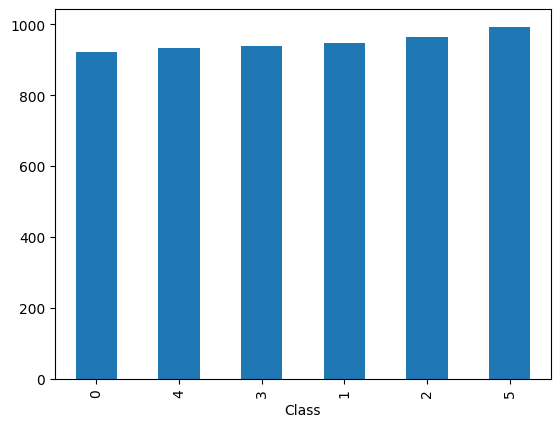

In [12]:
df_train['Class'].value_counts().sort_values().plot.bar()

In [13]:
df_train['Class'] = df_train['Class'].astype('str')

In [14]:
df_valid['Class'] = df_valid['Class'].astype('str')

In [15]:
df_test['Class'] = df_test['Class'].astype('str')

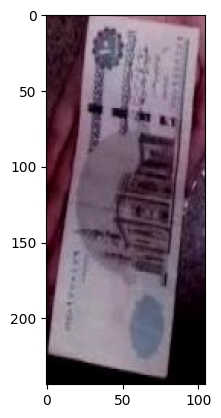

In [17]:
path = '/kaggle/working/train/'+df_train['path'][5]
img=plt.imread(path)
plt.imshow(img)

In [18]:
import os
from PIL import Image

# Define the folder path containing images
def new_image(df,Type=None):
    folder_path = f'/kaggle/input/egyptian-money-classification/Money/Money/{Type}/{image_name}'

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
      # Check if it's an image file (adjust extensions as needed)
      if filename.endswith(".jpg"):
        # Create the full image path
        image_path = os.path.join(folder_path, filename)

        # Open the image
        image = Image.open(image_path)

        # Resize logic (replace with your desired interpolation method)
        new_width, new_height = (width, height)  # Set your desired dimensions
        new_image = image.resize((new_width, new_height), resample=Image.LANCZOS)

        # Generate new filename (optional)
        new_filename = os.path.splitext(filename)[0] + "_resized.jpg"  # Add "_resized" suffix

        # Save the resized image in the working directory (use os.getcwd())
        new_image.save(os.path.join(os.getcwd(), new_filename))

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255, 
                                 horizontal_flip=True,
                                 vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
testing_datagen = ImageDataGenerator(rescale=1./255)

2024-04-24 19:07:52.267865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 19:07:52.268011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 19:07:52.404211: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
BATCH_SIZE=32
HEIGHT=224
WIDTH=224

In [24]:
train_dir='/kaggle/working/train/'
train_generator=train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory= train_dir,
    x_col="path",
    y_col="Class",
    class_mode="categorical", #categorical , binary 
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode='rgb', #"rgb", "rgba", or "grayscale"
    target_size=(HEIGHT, WIDTH),
    seed=0,)

Found 5699 validated image filenames belonging to 6 classes.


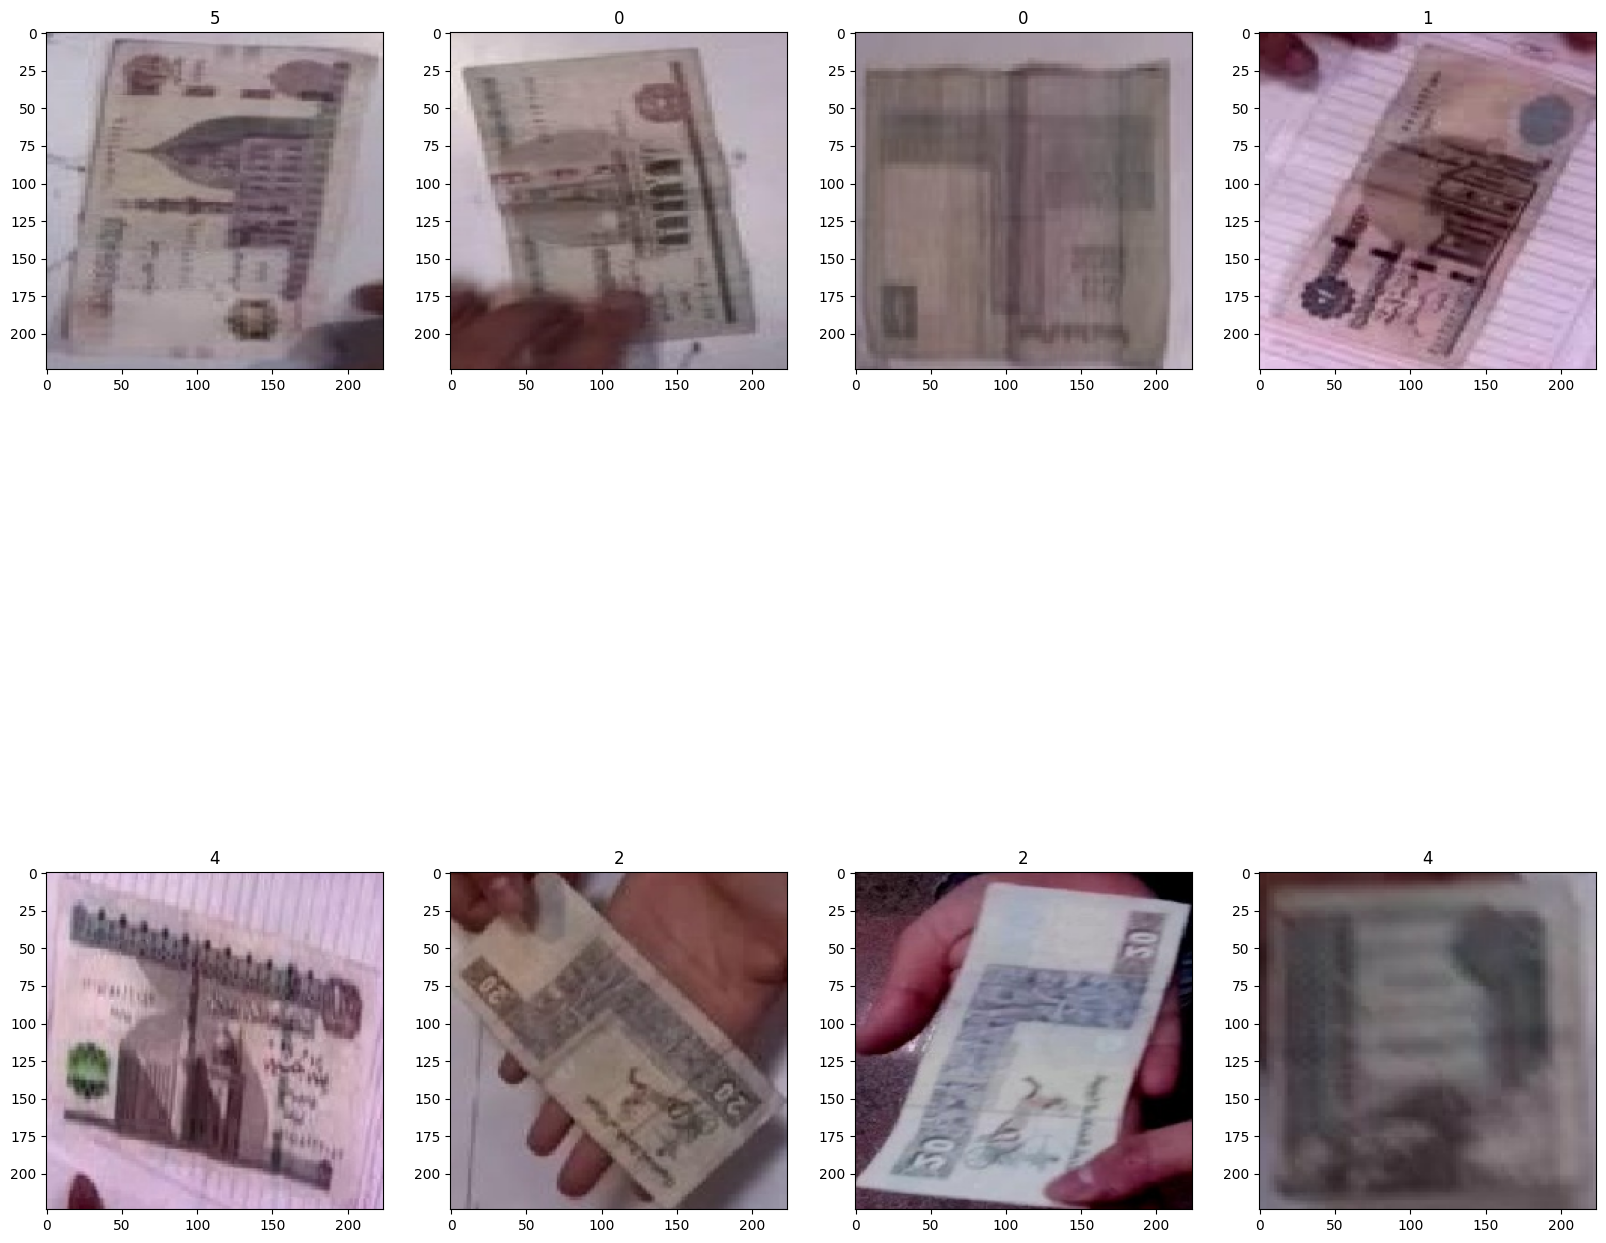

In [27]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [28]:
valid_dir='/kaggle/working/valid/'
valid_generator=validation_datagen.flow_from_dataframe(
    dataframe=df_valid,
    directory=valid_dir,
    x_col="path",
    y_col="Class",
    class_mode="categorical", 
    shuffle=False,
    batch_size=BATCH_SIZE, 
    color_mode='rgb', #grayscale
    target_size=(HEIGHT, WIDTH),
    seed=0)

Found 713 validated image filenames belonging to 6 classes.


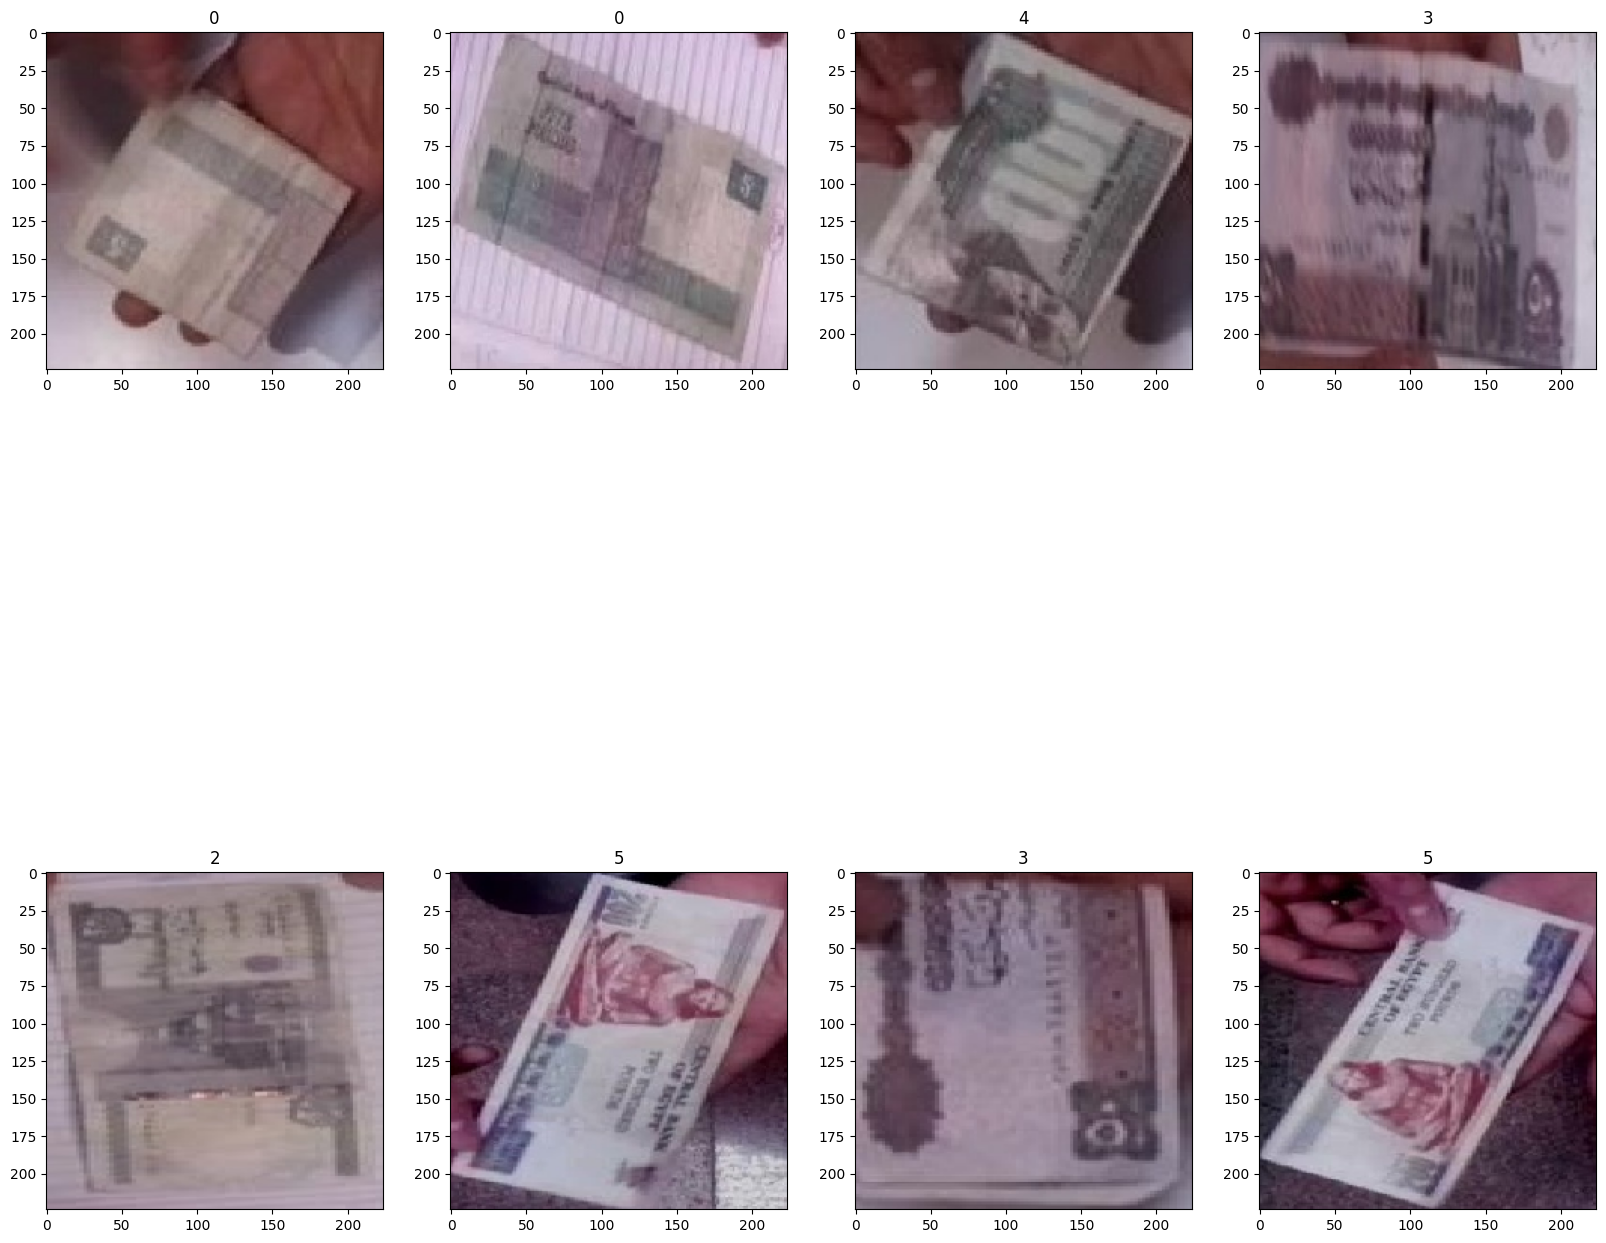

In [29]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [30]:
test_dir='/kaggle/working/test/'
test_generator=testing_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=test_dir,
    x_col="path",
    y_col="Class",
    class_mode="categorical", 
    shuffle=False,
    batch_size=BATCH_SIZE, 
    color_mode='rgb', #grayscale
    target_size=(HEIGHT, WIDTH),
    seed=0)

Found 707 validated image filenames belonging to 6 classes.


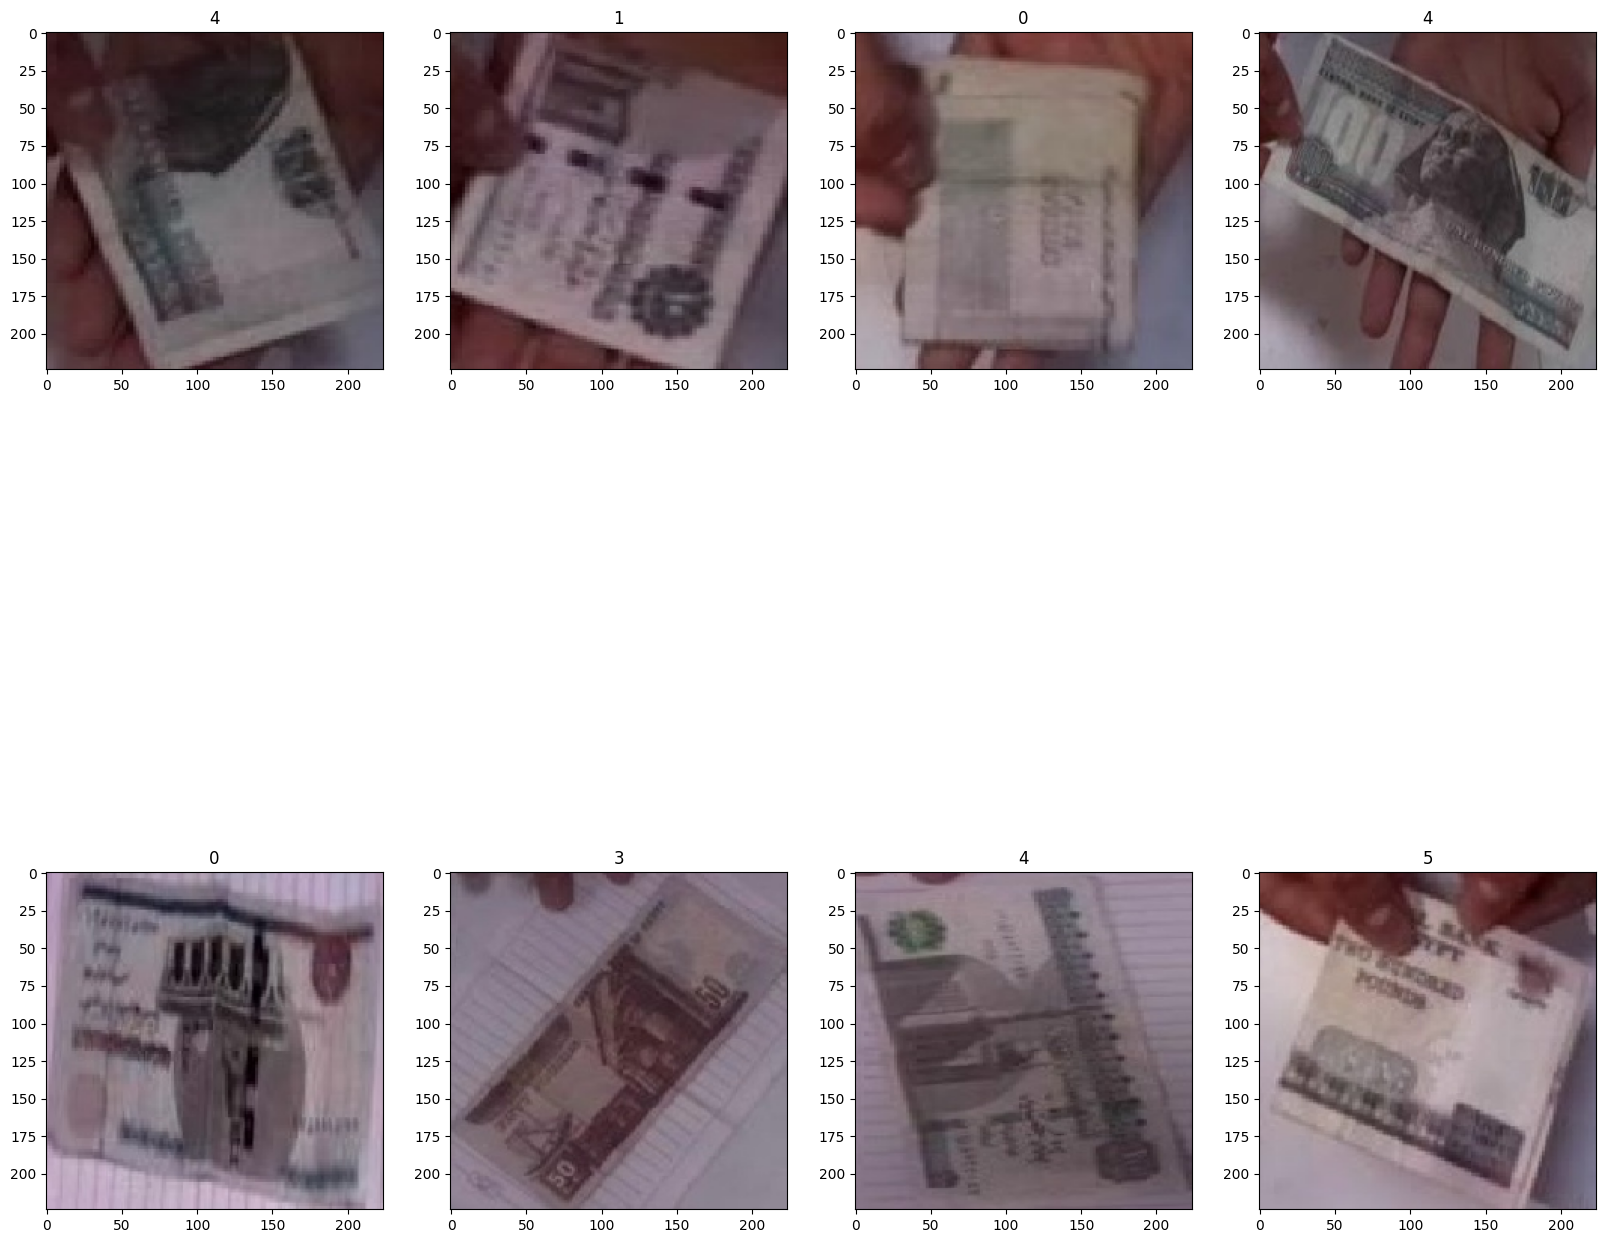

In [31]:
classes=list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [32]:
from keras.layers import Conv2D, MaxPool2D, Flatten, GlobalAvgPool2D, GlobalMaxPool2D, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
model = Sequential()

# CNN network
model.add( Conv2D(16, 3, activation='relu', input_shape=(HEIGHT, WIDTH, 3)) )
model.add( MaxPool2D(2) )

model.add( Conv2D(32, 3, activation='relu') )
model.add( MaxPool2D(2) )

model.add( Conv2D(64, 3, activation='relu') )
model.add( MaxPool2D(2) )

model.add( Conv2D(128, 3, activation='relu') )
model.add( MaxPool2D(2) )

model.add( Conv2D(256, 3, activation='relu') )

model.add( Conv2D(512, 3, activation='relu') )
# Transition between CNN and MLP
model.add( GlobalAvgPool2D() )

# MLP network
model.add( Dense(256, activation='relu') )

model.add( Dense(6, activation='softmax') )

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,705,638 (6.51 MB)

 Trainable params: 1,705,638 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow import keras
# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.00001, patience=5,
                                      monitor="val_loss", min_lr=0.0000001)

# Interrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, monitor = "val_loss",
                                                  restore_best_weights=True)

In [34]:
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator)-1,
                    epochs          = 100,  
                    validation_data = valid_generator, 
                    validation_steps=len(valid_generator)-1,
                    callbacks = [lr_scheduler, early_stopping_cb])

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/178 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.1597 - loss: 1.8041 

I0000 00:00:1713986090.946984      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713986090.967640      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2005 - loss: 1.7629

W0000 00:00:1713986106.664414      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


178/178 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.2007 - loss: 1.7625 - val_accuracy: 0.2983 - val_loss: 1.5021 - learning_rate: 0.0010
Epoch 2/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3438 - loss: 1.3817

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3438 - loss: 1.3817 - val_accuracy: 0.3333 - val_loss: 1.4158 - learning_rate: 0.0010
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.3293 - loss: 1.5067 - val_accuracy: 0.3920 - val_loss: 1.4384 - learning_rate: 0.0010
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.2188 - loss: 1.4966 - val_accuracy: 0.5556 - val_loss: 1.3538 - learning_rate: 0.0010
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.4256 - loss: 1.2987 - val_accuracy: 0.3764 - val_loss: 1.4353 - learning_rate: 0.0010
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.4375 - loss: 1.2701 - val_accuracy: 0.2222 - val_loss: 1.6465 - learning_rate: 0.0010
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.5135 - loss: 1.1224 - val_accuracy: 0.5284 - val_loss: 1.1033 - learning_rate: 0.0010
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.5938 - loss: 1.

In [38]:
 model.save('/kaggle/working//weights.h5')

In [44]:
model.load_weights('/kaggle/working/weights.h5')

In [46]:
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator)-1,
                    epochs          = 30,  
                    validation_data = valid_generator, 
                    validation_steps=len(valid_generator)-1,
                    callbacks = [lr_scheduler, early_stopping_cb])

Epoch 1/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9474 - loss: 0.1534 - val_accuracy: 0.9446 - val_loss: 0.1618 - learning_rate: 1.0000e-07
Epoch 2/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.9375 - loss: 0.1703 - val_accuracy: 1.0000 - val_loss: 0.0131 - learning_rate: 1.0000e-07
Epoch 3/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9551 - loss: 0.1404 - val_accuracy: 0.9474 - val_loss: 0.1591 - learning_rate: 1.0000e-07
Epoch 4/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 106us/step - accuracy: 0.9375 - loss: 0.2645 - val_accuracy: 1.0000 - val_loss: 0.0136 - learning_rate: 1.0000e-07
Epoch 5/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9438 - loss: 0.1624 - val_accuracy: 0.9489 - val_loss: 0.1568 - learning_rate: 1.0000e-07
Epoch 6/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.9062 - loss: 0.2355 - val_accuracy: 1.0000 - val_loss: 0.0141 - learning_rate: 1.0000e-07
Epoch 7/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/ste

In [47]:
model.evaluate(train_generator)

179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9516 - loss: 0.1576


[0.15612120926380157, 0.9487629532814026]

In [51]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

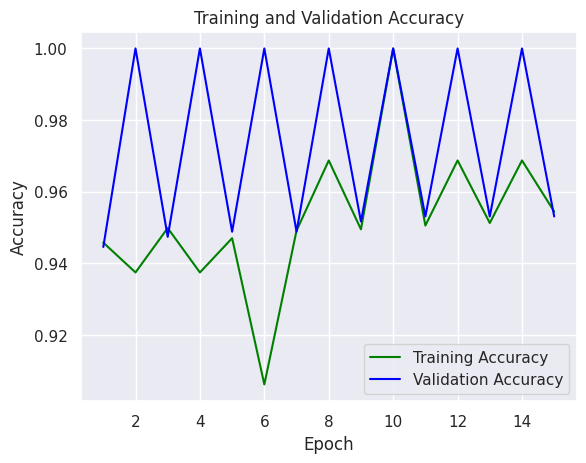

In [52]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

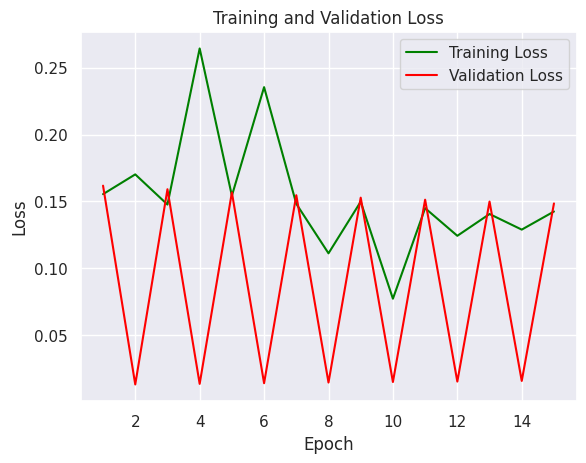

In [53]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

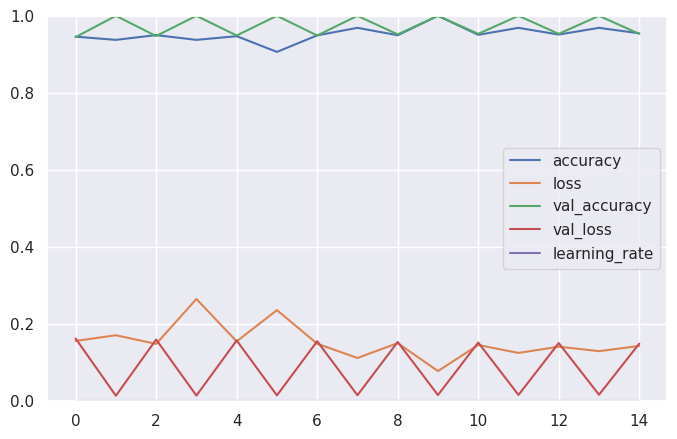

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
model.evaluate(valid_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9393 - loss: 0.1593


[0.1553598940372467, 0.9453015327453613]

In [56]:
predictions_valid = model.predict(valid_generator)

 4/23 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step 

W0000 00:00:1713987445.108627      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


              precision    recall  f1-score   support

     5 Pound   0.914729  0.967213  0.940239       122
    10 Pound   0.861789  0.963636  0.909871       110
    20 Pound   0.983193  0.959016  0.970954       122
    50 Pound   0.981651  0.922414  0.951111       116
   100 Pound   0.982906  0.891473  0.934959       129
   200 Pound   0.956897  0.973684  0.965217       114

    accuracy                       0.945302       713
   macro avg   0.946861  0.946239  0.945392       713
weighted avg   0.948241  0.945302  0.945617       713



<Figure size 1000x700 with 0 Axes>

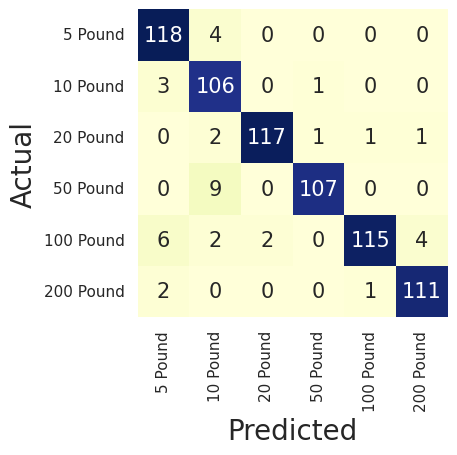

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
target_names = ['5 Pound', '10 Pound','20 Pound', '50 Pound','100 Pound', '200 Pound',]
report = classification_report(valid_generator.classes, predictions_valid.argmax(axis=-1), target_names=target_names, digits=6)
print(report)

disp = confusion_matrix(valid_generator.classes, predictions_valid.argmax(axis=-1))
disp.astype('int')
pd.options.display.float_format='{:.3f}'.format
df_cm = pd.DataFrame(disp, target_names, target_names)
plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(4,4))
sns.set(font_scale=1.5) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size":15},ax=ax, cmap="YlGnBu", fmt='g',cbar=False) #font
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ioff()
plt.show()

In [58]:
model.evaluate(test_generator)

 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9444 - loss: 0.2121

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9573 - loss: 0.1480


[0.13439902663230896, 0.9589816331863403]

In [59]:
predictions_test = model.predict(test_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


              precision    recall  f1-score   support

     5 Pound   0.909774  0.991803  0.949020       122
    10 Pound   0.928000  0.974790  0.950820       119
    20 Pound   0.973684  0.982301  0.977974       113
    50 Pound   0.990291  0.910714  0.948837       112
   100 Pound   0.990654  0.921739  0.954955       115
   200 Pound   0.976000  0.968254  0.972112       126

    accuracy                       0.958982       707
   macro avg   0.961401  0.958267  0.958953       707
weighted avg   0.960770  0.958982  0.959002       707



<Figure size 1000x700 with 0 Axes>

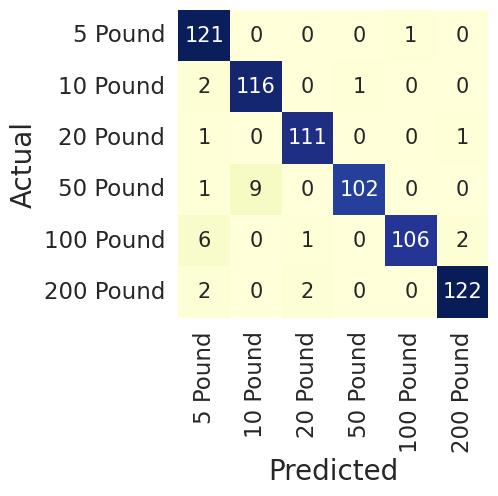

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

target_names = ['5 Pound', '10 Pound','20 Pound', '50 Pound','100 Pound', '200 Pound',]
report = classification_report(test_generator.classes, predictions_test.argmax(axis=-1), target_names=target_names, digits=6)
print(report)

disp = confusion_matrix(test_generator.classes, predictions_test.argmax(axis=-1))
disp.astype('int')
pd.options.display.float_format='{:.3f}'.format
df_cm = pd.DataFrame(disp, target_names, target_names)
plt.figure(figsize=(10,7))
fig, ax = plt.subplots(figsize=(4,4))
sns.set(font_scale=1.5) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size":15},ax=ax, cmap="YlGnBu", fmt='g',cbar=False) #font
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ioff()
plt.show()

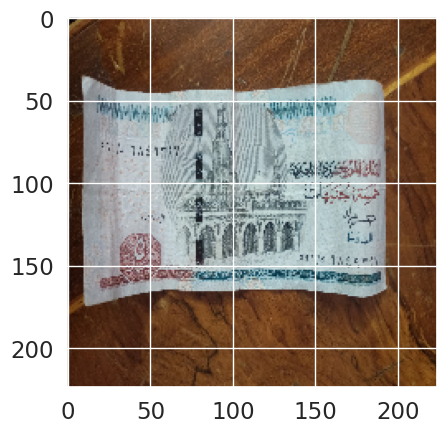

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predict :  100 Pound
Actual  :  5 Pound


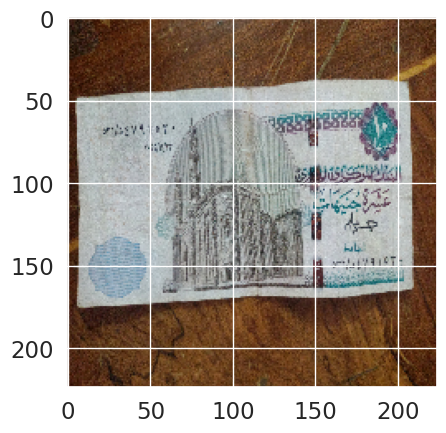

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predict :  100 Pound
Actual  :  10 Pound


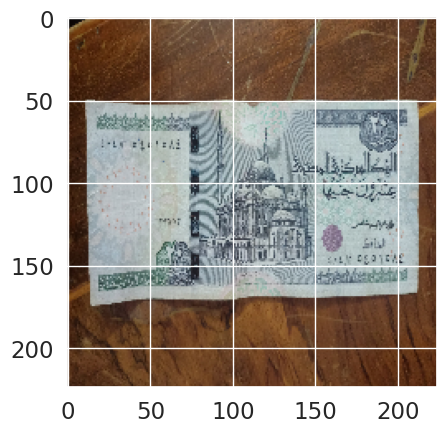

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predict :  100 Pound
Actual  :  20 Pound


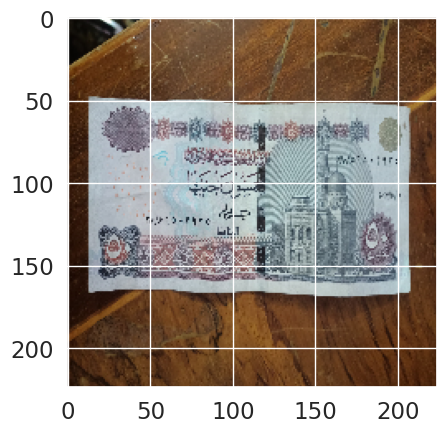

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predict :  100 Pound
Actual  :  50 Pound


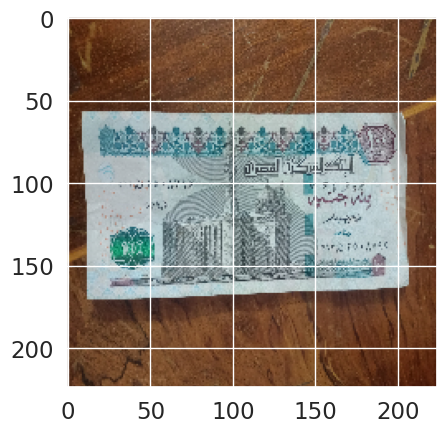

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predict :  100 Pound
Actual  :  100 Pound


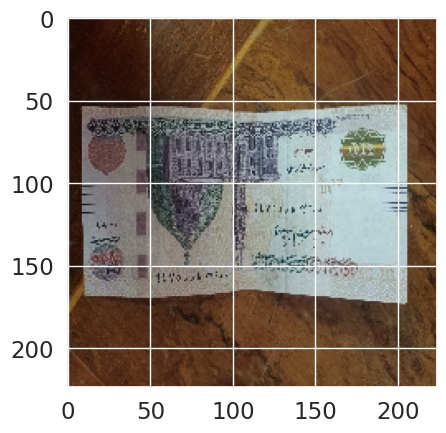

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predict :  100 Pound
Actual  :  200 Pound


In [65]:
for i in [5,10,20,50,100,200]:
    
    img = cv2.imread(f"/kaggle/input/egyptian-money-classification/{i} Pound.jpg")
    H,W,C = 224,224,3
    img = cv2.resize(img, (H, W)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    plt.imshow(img)
    plt.show()
    img = img.astype("float32")  
    img = img / 255.0
    img = img.reshape(1,H,W,C)

    prediction = np.argmax(model.predict(img),axis=-1)
    target_names = ['5 Pound', '10 Pound','20 Pound', '50 Pound','100 Pound', '200 Pound',]

    print('Predict : ',target_names[prediction[0]])
    print(f'Actual  :  {i} Pound')